In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter 
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "ai_job_dataset.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bismasajjad/global-ai-job-market-and-salary-trends-2025",
  file_path,
)

df_grouped = df.groupby(['salary_currency', 'experience_level'])['job_title'].size().reset_index(name='value')

df_sorted = df_grouped.sort_values(by=('value'), ascending=False).reset_index(drop=True)

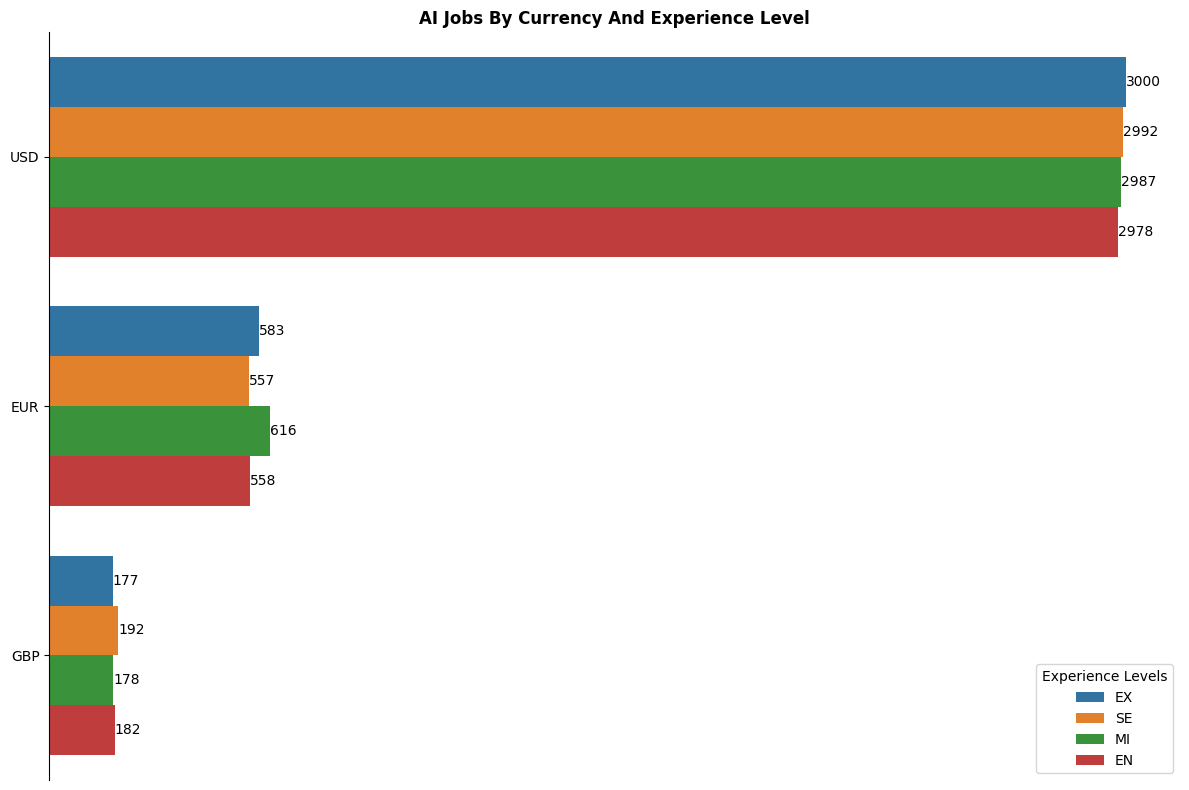

In [2]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=df_sorted, orient='h', ax=ax, x='value', y='salary_currency', hue='experience_level')

for container in ax.containers: 
    ax.bar_label(container, fmt="%.0f")

ax.set_title("AI Jobs By Currency And Experience Level", fontweight="bold")
ax.set_ylabel("")
ax.xaxis.set_visible(False)
sns.despine(bottom=True)
ax.legend(title="Experience Levels")

plt.tight_layout()
plt.show()